In [1]:
%load_ext autoreload
%autoreload 2

# Naive Bayes

## Iris Dataset

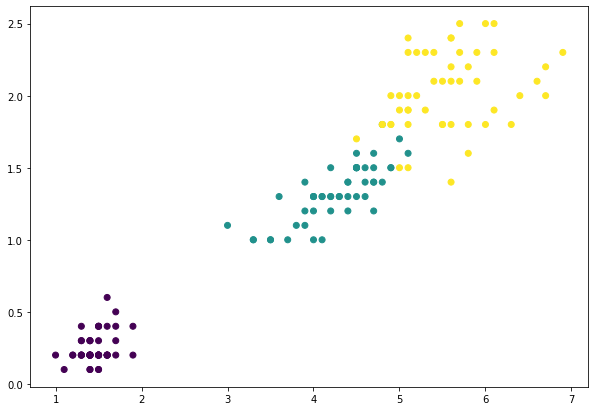

In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

plt.figure(figsize=(10, 7))


plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

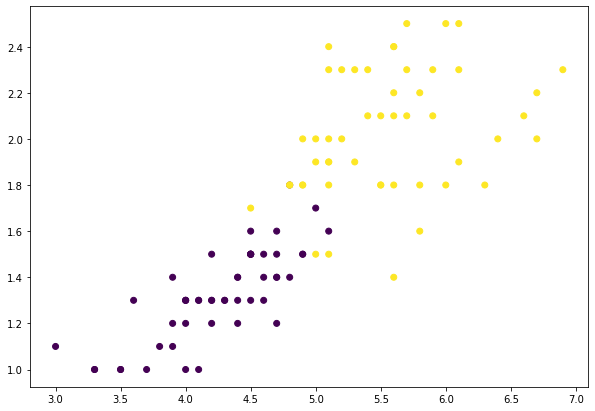

In [5]:
X = X_iris[y_iris != 0]
y = y_iris[y_iris != 0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10 ,7))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
y = np.where(y==y.min(), 0, 1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [43]:
model_pipeline['model'].class_prior_

array([0.5, 0.5])

In [19]:
from plot_utils import MetricsUtils

metrics = MetricsUtils(X_train, X_test, y_train, y_test, model_pipeline)

In [20]:
metrics.show_scores()

Accuracy: 0.95
Recall: 0.90
Precision: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [21]:
metrics.show_scores(test=False)

Accuracy: 0.94
Recall: 0.95
Precision: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.93      0.95      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



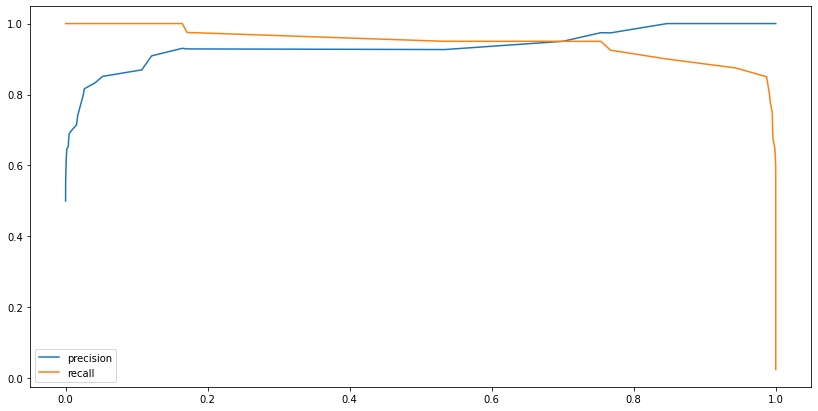

In [22]:
metrics.show_precision_recall()

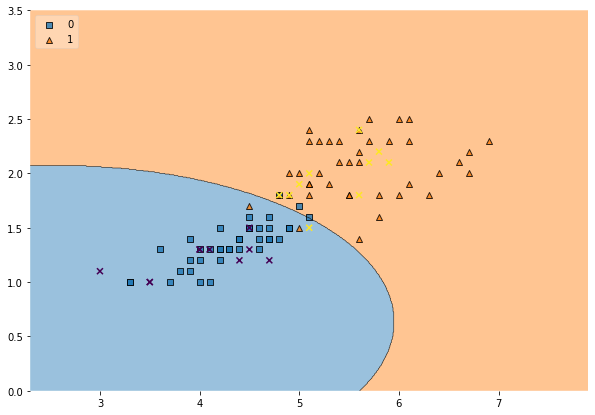

In [23]:
metrics.plot_boundary()

## Spam

In [24]:
import pandas as pd

In [25]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/spam.csv"
df = pd.read_csv(path, encoding='latin-1')[['v1', 'v2']]

In [26]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.columns = ['label', 'message']
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [28]:
X = df['message']
y = df['label']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', 
                             max_features=3000,
                             lowercase=True,
                             min_df=0.001,
                             max_df=0.99
                             )

In [31]:
X_tr = vectorizer.fit_transform(X_train)

In [32]:
X_tr = X_tr.toarray()
X_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
X_tr.shape

(4457, 1361)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

param={'stop_words': 'english', 
      'max_features': 3000,
      'lowercase': True,
      'min_df': 0.001,
      'max_df': 0.99}

spam_filter = Pipeline([
    ('vectorizer', CountVectorizer(**param)), 
    ('classifier', MultinomialNB())                    
])

In [35]:
spam_filter.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.99, max_features=3000, min_df=0.001,
                                 stop_words='english')),
                ('classifier', MultinomialNB())])

In [38]:
y_pred = spam_filter.predict(X_test)
y_train_pred = spam_filter.predict(X_train)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       972
        spam       0.93      0.96      0.94       143

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.98      0.98      1115



In [40]:
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3863
        spam       0.94      0.95      0.95       594

    accuracy                           0.99      4457
   macro avg       0.97      0.97      0.97      4457
weighted avg       0.99      0.99      0.99      4457



In [41]:
spam_filter.predict_proba(X_test)

array([[9.99901484e-01, 9.85158952e-05],
       [9.97785871e-01, 2.21412931e-03],
       [9.99999478e-01, 5.22006640e-07],
       ...,
       [9.98541734e-01, 1.45826589e-03],
       [9.89332160e-01, 1.06678403e-02],
       [9.98269721e-01, 1.73027876e-03]])

In [44]:
spam_filter['classifier'].class_log_prior_

array([-0.14432698, -2.00696957])